# **ACHU S VIJAYAN**

# **TCS INTERNSHIP** 

# HR SALARY PREDICTION DASHBOARD

**Problem Statement**

The goal of this project is to clean the data, analysis and predict whether a person's salary is higher or lower than $50k/year based on their attributes using several ML classification techniques.

### Loading the dataset into Python enviornment

In [1]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from collections import Counter
def printmd(string):
    display(Markdown(string))


# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv('salarydata.csv')

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Understanding the dataset

In [5]:
data.shape

(32561, 14)

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
def data_info(data):
    print('Number of Columns in the dataset: ',data.shape[1])
    print('Number of rows in the dataset: ',data.shape[0])
    print('Total number of datapoints in the dataset:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(data)

Number of Columns in the dataset:  14
Number of rows in the dataset:  32561
Total number of datapoints in the dataset: 455854
Count of Numerical Features: 5
Count of Categorical Features: 9


In [8]:
def unique_checker(data):
    """loops and prints unique values in each column"""
    for col in data.columns:
        print("Unique values in {} feature.".format(col))
        print(data[col].unique(),"\n")
        print("*"*40)

In [9]:
unique_checker(data) #scroll / toggle output to view all outputs

# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Unique values in age feature.
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

****************************************
Unique values in workclass feature.
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

****************************************
Unique values in education feature.
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

****************************************
Unique values in education-num feature.
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

****************************************
Unique values in marital-status feature.
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separat

In [10]:
def count_checker(data):
    """count of each value under each feature in the data"""
    for col in data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(data[col].value_counts(),"\n")
        print("*"*40)

In [11]:
count_checker(data) #scroll / toggle output to view all outputs
# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Count for each category of values in age feature.
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

****************************************
Count for each category of values in workclass feature.
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

****************************************
Count for each category of values in education feature.
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool   

**Findings**

- The dataset contains 48,842 entries with a total of 15 columns representing different attributes of the people. Here’s the list;

1. Age: Discrete (from 17 to 90)
2. Work class (Private, Federal-Government, etc): Nominal (9 categories)
3. Final Weight (the number of people the census believes the entry represents): Discrete
4. Education (the highest level of education obtained): Ordinal (16 categories)
5. Education Number (the number of years of education): Discrete (from 1 to 16)
6. Marital Status: Nominal (7 categories)
7. Occupation (Transport-Moving, Craft-Repair, etc): Nominal (15 categories)
8. Relationship in family (unmarried, not in the family, etc): Nominal (6 categories)
9. Race: Nominal (5 categories)
10. Sex: Nominal (2 categories)
11. Capital Gain: Continous
12. Capital Loss: Continous
13. Hours (worked) per week: Discrete (from 1 to 99)
14. Native Country: Nominal (42 countries)
15. Salary (whether or not an individual makes more than 50,000 dollar annually):     Boolean (≤50k, >50k)

In [12]:
#creating a Dataframe from the given dataset
df = pd.DataFrame(data)
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

### Renaming the columns

In [13]:

#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss', 'native-country': 'country','hours-per-week': 'hours_per_week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

### Data Cleaning

### Missing Values

In [14]:
 #check the missing value
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

**Above sum shows there are no null values in the dataset.**

In [15]:
#we can see that there are some special characters in the data like ‘?’.
#Finding the special characters in the data frame
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
country            583
salary               0
dtype: int64

**Findings**

- we see that there is a special character as " ?" for columns workcalss, Occupation, and country, we need to clean those data. 
- In this case, as the missing value fall into the categorical features, we will use the pandas DataFrame mode() method to fill the missing value.

In [16]:
#Handling missing values
# the code will replace the special character to nan  
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)



In [17]:

df.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
country            583
salary               0
dtype: int64

In [18]:
#we will use the pandas DataFrame mode() method to fill the missing value.
df = df.fillna(df.mode().iloc[0])

In [19]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

### Remove duplicate data 

In [20]:
#Checking for duplicated entries
sum(df.duplicated(df.columns))

3591

In [21]:
#Delete the duplicates and check that it worked
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [22]:
df.shape

(28970, 14)

In [23]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

### Handling Outliers

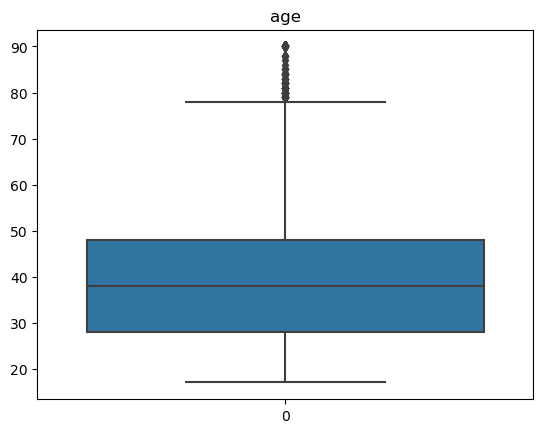

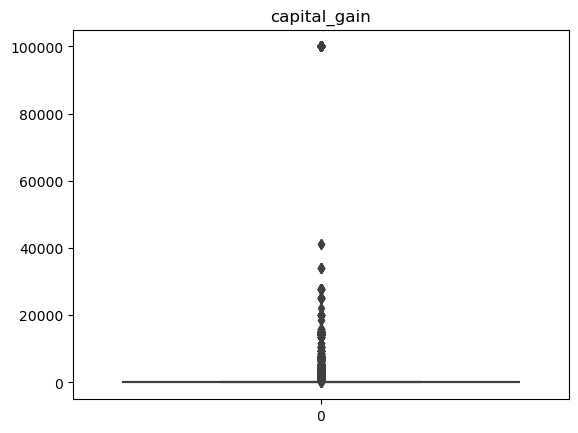

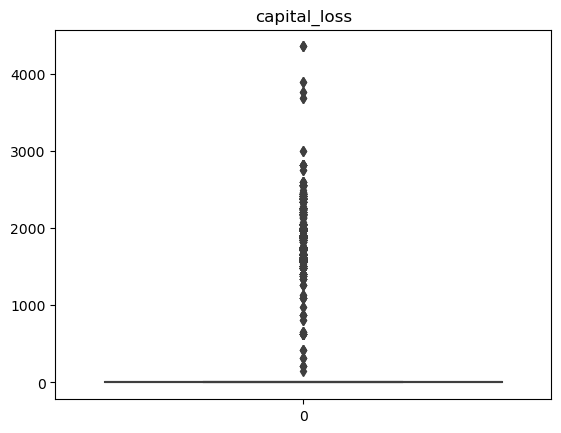

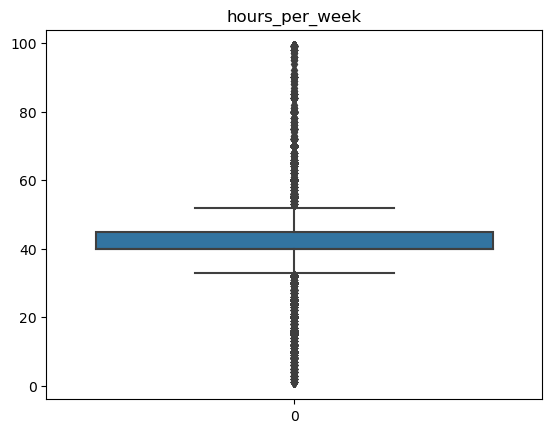

In [24]:
## checking outliers
for i in ['age',
       'capital_gain','capital_loss','hours_per_week'] :
    plt.title(i)
    sns.boxplot(data=df[i])
    plt.show()  


# Outlier handling of age


In [25]:
q1 = np.percentile(df['age'],25,interpolation='midpoint')
q3 = np.percentile(df['age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['age'][(df['age']<low_limit)|(df['age']>high_limit)].index
df.drop(index,inplace=True)

Text(0.5, 1.0, 'Box plot of age after removal of outlier')

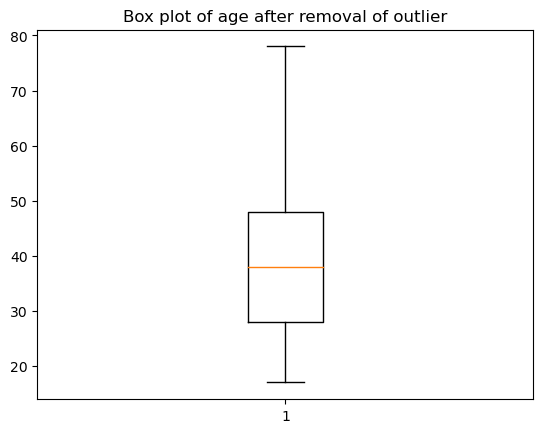

In [26]:
plt.boxplot(df['age'])
plt.title('Box plot of age after removal of outlier')

### Outlier handling of hours_per_week


In [27]:
q1 = np.percentile(df['hours_per_week'],25,interpolation='midpoint')
q3 = np.percentile(df['hours_per_week'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['hours_per_week'][(df['hours_per_week']<low_limit)|(df['hours_per_week']>high_limit)].index
df.drop(index,inplace=True)

Text(0.5, 1.0, 'Box plot of hours-per-week after removal of outlier')

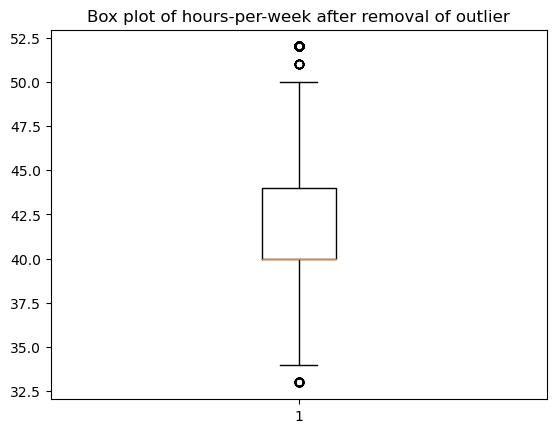

In [28]:
plt.boxplot(df['hours_per_week'])
plt.title('Box plot of hours-per-week after removal of outlier')

### Exploratory Data analysis

#### Check descriptive statistics - Numerical columns

In [29]:
df.describe()

,age,education-num,capital_gain,capital_loss,hours_per_week
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,39.333838,10.119797,1127.431845,100.393443,41.673441
std,12.211260,2.627231,7149.224082,428.671634,4.145915
min,17.000000,1.000000,0.000000,0.000000,33.000000
25%,30.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,44.000000
max,78.000000,16.000000,99999.000000,4356.000000,52.000000


#### Check descriptive statistics - Categorical columns

In [30]:
df.describe(exclude='number')

,workclass,education,marital,occupation,relationship,race,sex,country,salary
count,20468,20468,20468,20468,20468,20468,20468,20468,20468
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,15047,6447,9623,3529,8397,16960,13792,18372,15092


###  Feature Reduction 

- While analyzing the dataset, 
- As we can see in 'descriptive statistics - Numerical columns',
    - 'capital-gain'and 'capital-loss' both columns have 75% data as 0.00
            - So, we can drop 'capital-gain'& 'capital-loss' both columns. 
- The column,education-num is the numerical version of the column education, so we also drop it.

In [31]:
df.drop(['capital_gain','capital_loss','education-num'], axis = 1,inplace = True)
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [32]:
df.shape

(20468, 11)

Now, we need to convert the categorical values to numeric for modeling. Looking at the Marital-status col, there are nearly 6 different values which would mean the same as two values of being married ot no married, therefore we convert them into only two values.

In [33]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

In [34]:
df['marital'].value_counts()

married        9946
not married    7246
divorced       3276
Name: marital, dtype: int64

Before we do further analysis, we will separate the data as numeric and categorical so that our analysis becomes easy.

In [35]:
# NUMERIC FEATURES:

numeric_data = df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns 

print('Numeric Features: ')
print(numeric_data.head(5))
print('----'*20)

Numeric Features: 
   age  hours_per_week
0   39              40
2   38              40
3   53              40
4   28              40
5   37              40
--------------------------------------------------------------------------------


In [36]:

# CATEGORICAL FEATURES:

categorical_data = df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns

print('Categorical Features: ')
print(categorical_data.head(5))
print('----'*20)

Categorical Features: 
   workclass  education      marital         occupation   relationship   race  \
0  State-gov  Bachelors  not married       Adm-clerical  Not-in-family  White   
2    Private    HS-grad     divorced  Handlers-cleaners  Not-in-family  White   
3    Private       11th      married  Handlers-cleaners        Husband  Black   
4    Private  Bachelors      married     Prof-specialty           Wife  Black   
5    Private    Masters      married    Exec-managerial           Wife  White   

      sex        country salary  
0    Male  United-States  <=50K  
2    Male  United-States  <=50K  
3    Male  United-States  <=50K  
4  Female           Cuba  <=50K  
5  Female  United-States  <=50K  
--------------------------------------------------------------------------------


### Data visualization

#### NUMERIC DATA:

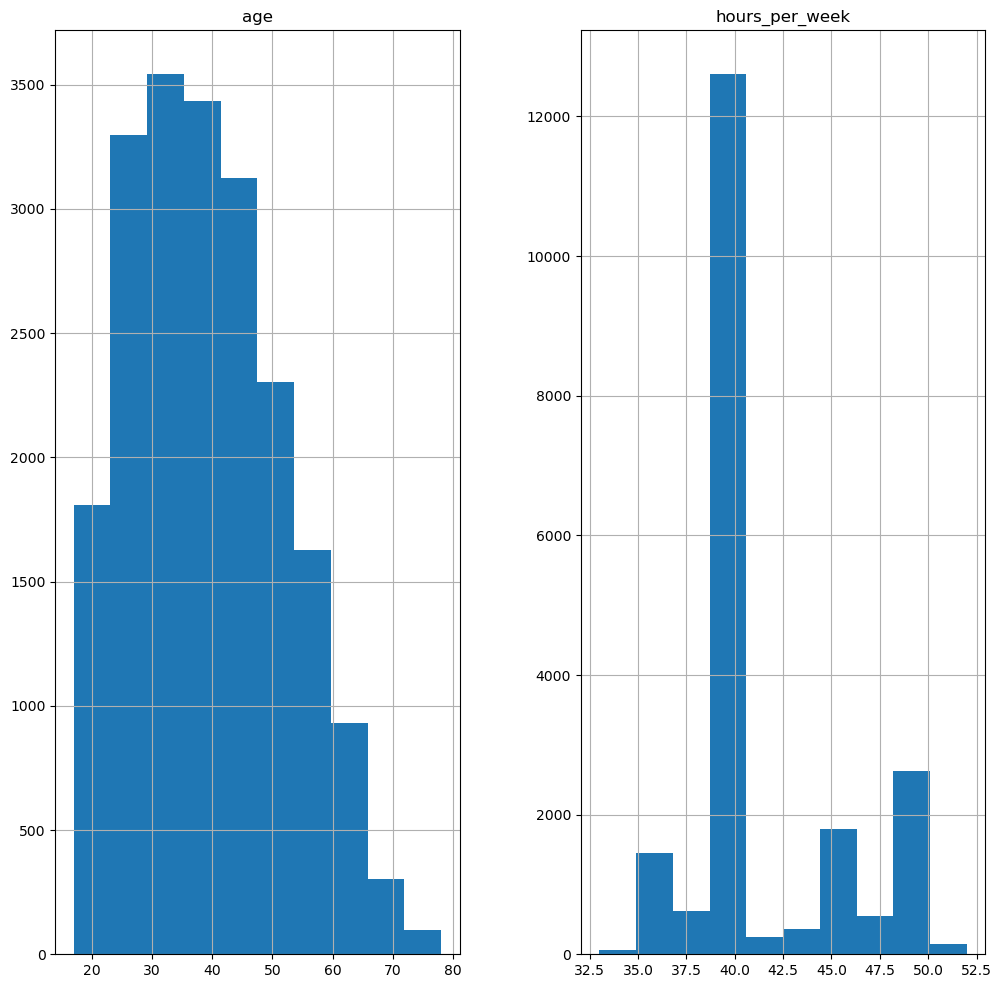

In [37]:
# let's see how data is distributed for every column
df.hist(figsize=(12,12), sharex=False);

**Findings**
- The minimum age is 17 and the maximum is 90 years, most of the working age group lies between 20-40
- The minimum hours-per-week is 1 and maximum is 90, with most of the count lying between 30-40

### CATEGORICAL DATA:

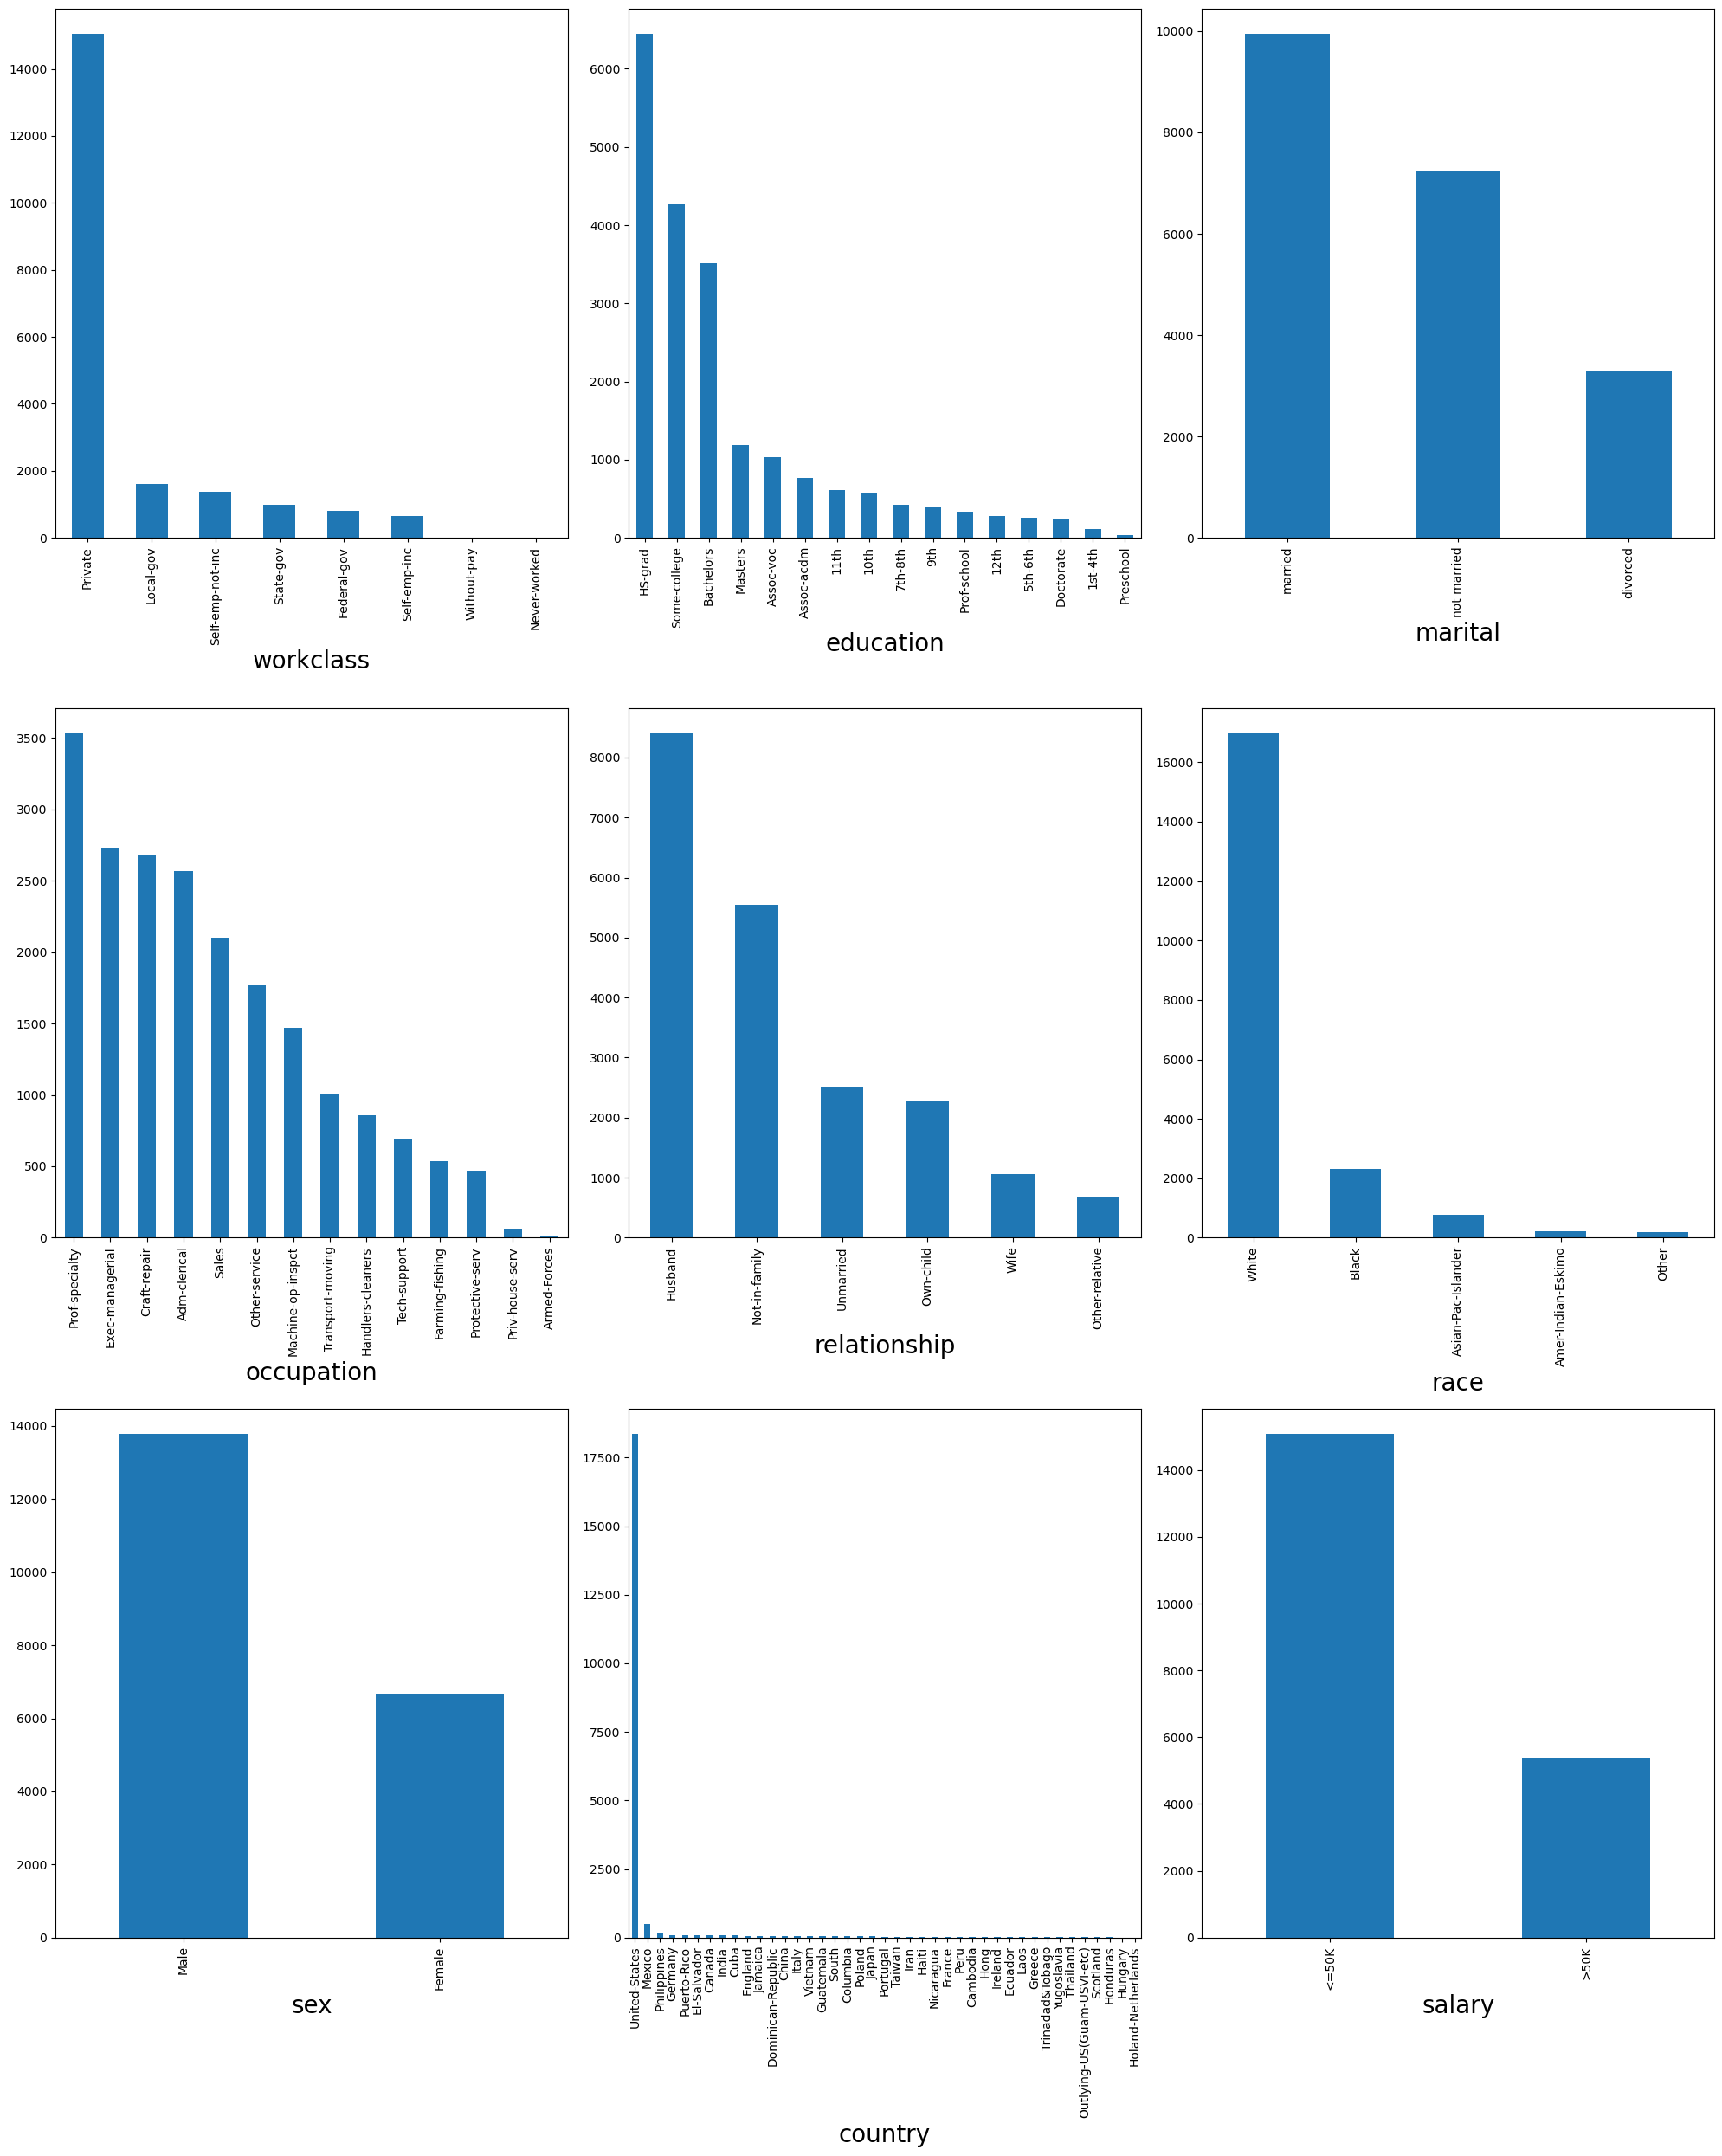

In [38]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in categorical_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        categorical_data[column].value_counts().plot(kind='bar')
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Findings**
- if we look at the workclass variable variable we can see that 74% people are privately employed, 26% belong to other 7 categories.
- Looking at the education, majority of people have completed high graduation, have attended college or have atleast completed masters.
- Considering the marital status, 50% are married and 35% are never married.
- The occupation variable is equally distributed among various occupations.
- If we consider the race variable, 92% are white and 8% belong to 4 other races.
- 72% of the people in the data are male.
- 96% of the people belong to US, 4% elong to remaining countries.
- 25% people have salary above 50k and 75% below 50k, this indicated that we have imbalanced data.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Cuba'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Mexico'),
  Text(4, 0, 'Puerto-Rico'),
  Text(5, 0, 'England'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Iran'),
  Text(9, 0, 'Philippines'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Poland'),
  Text(12, 0, 'Cambodia'),
  Text(13, 0, 'Ecuador'),
  Text(14, 0, 'Laos'),
  Text(15, 0, 'Taiwan'),
  Text(16, 0, 'Portugal'),
  Text(17, 0, 'El-Salvador'),
  Text(18, 0, 'France'),
  Text(19, 0, 'South'),
  Text(20, 0, 'Dominican-Republic'),
  Text(21, 0, 'Jamaica'),
  Text(22, 0, 'Honduras'),
  Text(23, 0, 'Haiti'),
  Text(24, 0, 'China'),
  Text(25, 0, 'Guatemala'),
  Text(26, 0, 'Japan'),
  Text(27, 0, 'Yugoslavia'),
  Text(28, 0, 'Peru'),
  Text(29, 0, 'Outlying-US(Guam-USVI-etc)'),
  Text(30, 0,

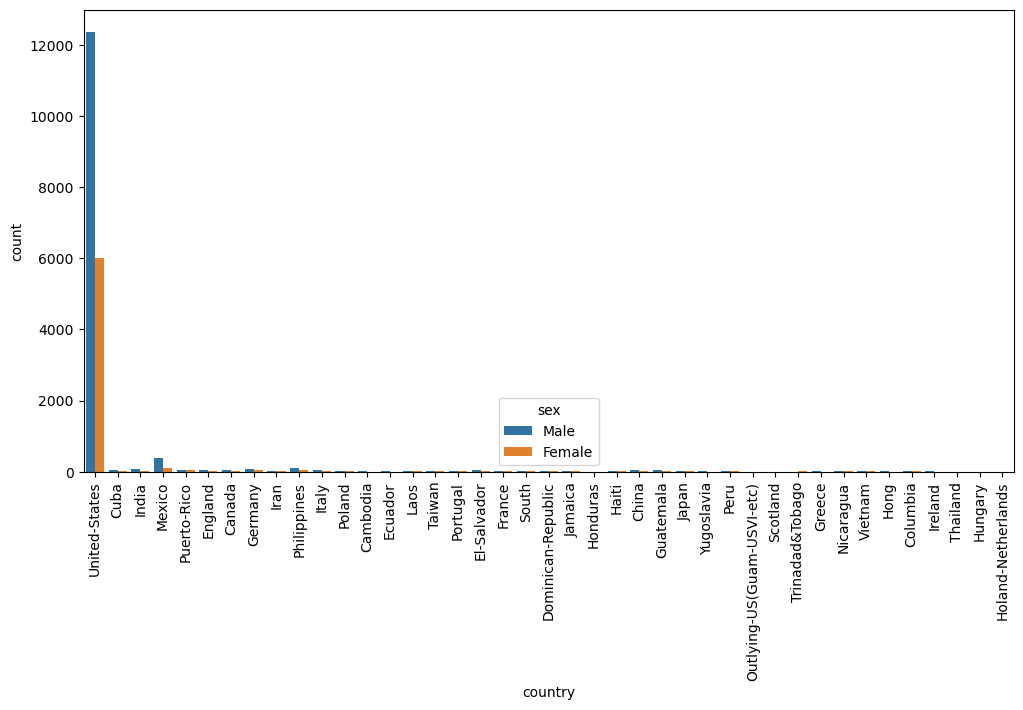

In [39]:
# Now check Gender diversity across departmets

plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['country'],hue=df['sex'])
plt.xticks(rotation=90)

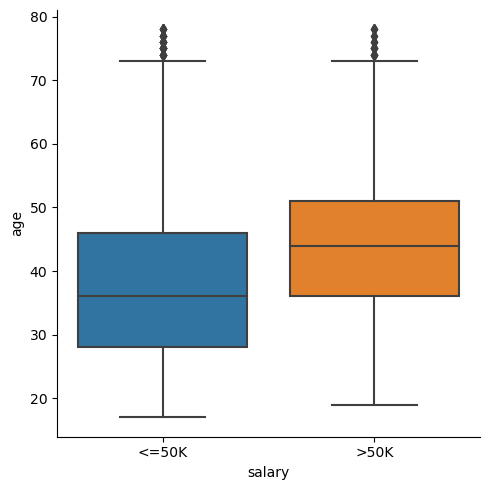

In [40]:
# Plotting Salary vs age
sns.catplot(x="salary", y= "age", kind="box", data=df)

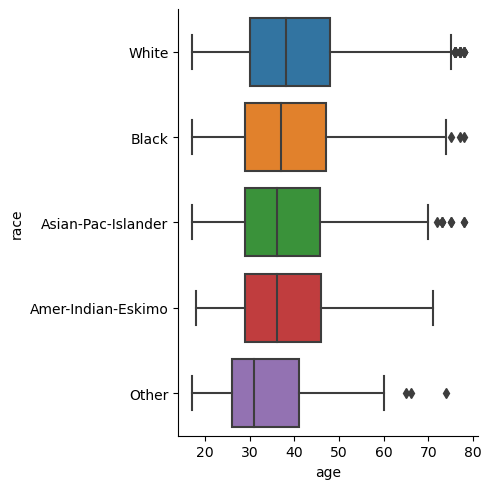

In [41]:
# Plotting Salary vs fnlwgt
sns.catplot(x="age", y= "race", kind="box", data=df)

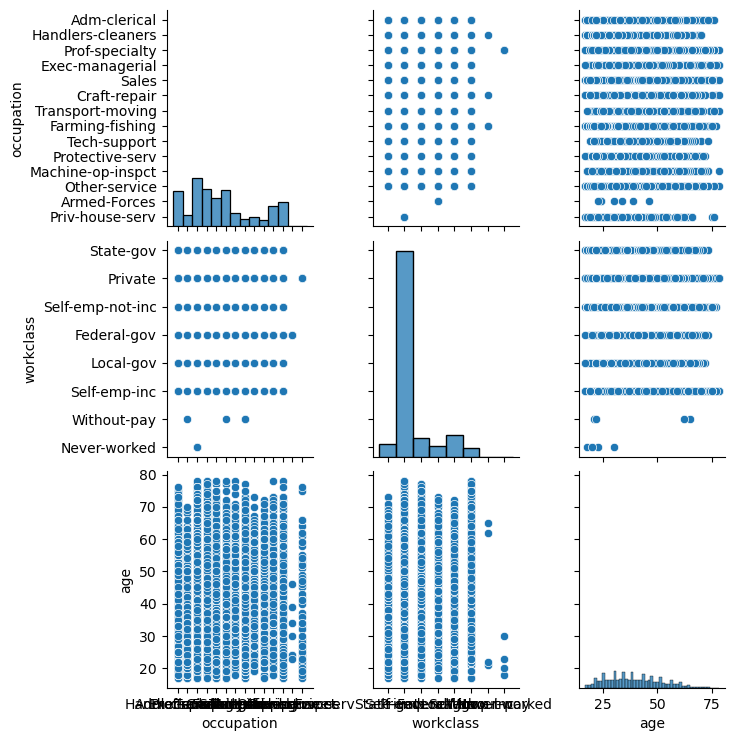

In [42]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = df, vars=['occupation','workclass','age'])
plt.xlabel(column,fontsize=20)
plt.xticks(rotation=90)
plt.show()

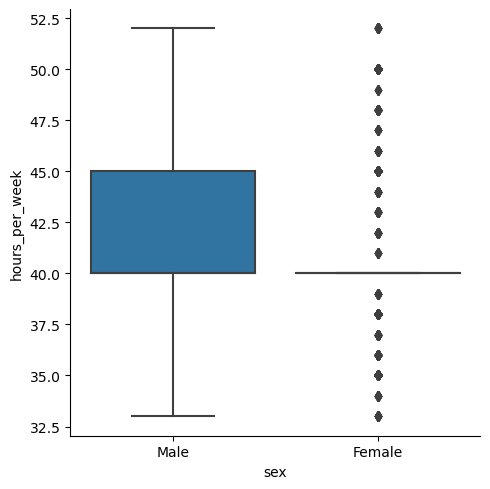

In [43]:
# Plotting Salary vs hours_per_week
sns.catplot(x="sex", y= "hours_per_week", kind="box", data=df)

## Feature Engineering

In [44]:
# education Category
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [45]:
# Salary
df.Salary = df.salary.replace('<=50K', 0)
df.Salary = df.salary.replace('>50K', 1)

In [46]:
df.corr()

,age,hours_per_week
age,1.000000,0.036539
hours_per_week,0.036539,1.000000


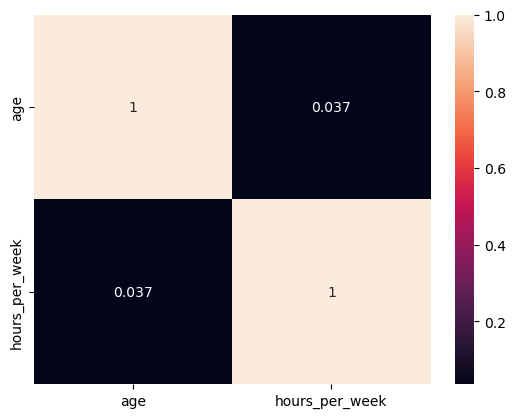

In [47]:
sns.heatmap(df.corr(), annot=True);

In [48]:
# Salary
df.Salary = df.Salary.replace( 0,'<=50K')
df.Salary = df.Salary.replace( 1,'>50K')

In [49]:
df['salary'].value_counts()

<=50K    15092
>50K      5376
Name: salary, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20468 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             20468 non-null  int64 
 1   workclass       20468 non-null  object
 2   education       20468 non-null  object
 3   marital         20468 non-null  object
 4   occupation      20468 non-null  object
 5   relationship    20468 non-null  object
 6   race            20468 non-null  object
 7   sex             20468 non-null  object
 8   hours_per_week  20468 non-null  int64 
 9   country         20468 non-null  object
 10  salary          20468 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.4+ MB


## Encoding

In [52]:
df.columns

Index(['age', 'workclass', 'education', 'marital', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [53]:
unique_checker(df)

Unique values in age feature.
[39 38 53 28 37 52 31 42 30 32 40 34 25 43 35 59 56 23 20 45 48 24 49 57
 44 41 29 27 33 76 47 36 22 19 46 61 70 64 21 51 26 58 60 54 50 66 65 55
 77 63 17 62 67 72 69 18 73 71 78 75 68 74] 

****************************************
Unique values in workclass feature.
['State-gov', 'Private', 'Self-emp-not-inc', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'] 

****************************************
Unique values in education feature.
['undergrad' 'high school' 'school' 'grad' 'higher' 'doc'] 

****************************************
Unique values in marital feature.
['not married' 'divorced' 'married'] 

****************************************
Unique values in occupation feature.
['Adm-clerical' 'Handlers-cleaners' 'Prof-specialty' 'Exec-managerial'
 'Sales' 'Craft-repair' 'Transport

### One-Hot Encoding

In [54]:
#Select the variables to be one-hot encoded
#one_hot_features = ['marital','sex']
#df = pd.get_dummies(df, columns=one_hot_features)

In [55]:
#df.head()

### Label Encoding

In [56]:
#label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric 
df['workclass']  = le.fit_transform(df['workclass'])
df['education']  = le.fit_transform(df['education'])
df['occupation']  = le.fit_transform(df['occupation'])
df['relationship']  = le.fit_transform(df['relationship'])
df['race']  = le.fit_transform(df['race'])
df['country']  = le.fit_transform(df['country'])
df['marital']  = le.fit_transform(df['marital'])
df['sex']  = le.fit_transform(df['sex'])

In [57]:
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,hours_per_week,country,salary
0,39,6,5,2,0,1,4,1,40,38,<=50K
2,38,3,2,0,5,1,4,1,40,38,<=50K
3,53,3,4,1,5,0,2,1,40,38,<=50K
4,28,3,5,1,9,5,2,0,40,4,<=50K
5,37,3,1,1,3,5,4,0,40,38,<=50K
